In [6]:
import os

import numpy as np
import matplotlib.pyplot as plt

from General.Analysis import Analyzer
from General.Data_handling import DataSet, import_hdf5, drive_letter
from Data_handling.Conversion import read_raw8



0.8197423922177033
1.0235641485166145
1.0020871416221817
1.1279539879894578
1.1612227358924978
1.1502011192465016


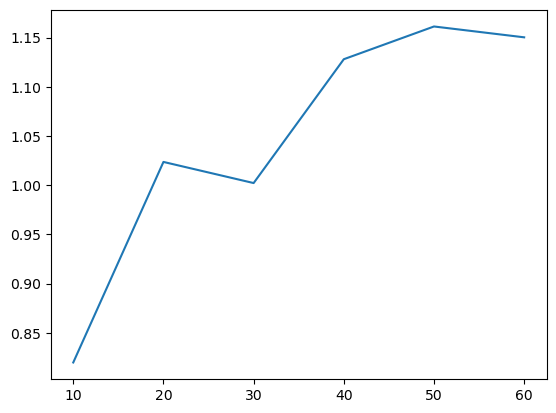

In [17]:
loc = rf'{drive_letter()}:\OneDrive - TU Eindhoven\Master thesis\Measurements\Robin\PAW Final\PAW Final 1306'
# loc = rf'E:\OneDrive - TU Eindhoven\Master thesis\Measurements\Robin\PAW Measurements'
sublocs = [loc for loc in os.scandir(loc) if loc.is_dir()]
times = [10, 20, 30, 40, 50, 60]
ratios = []

for subloc in sublocs:
    files = os.scandir(subloc.path)
    datas = [read_raw8(file.path) for file in files]
    wavelength = datas[0].wavelength
    mask = (253 < wavelength) & (wavelength < 398)
    wavelength = wavelength[mask]
    intensity = np.average(np.array([np.log10((data.reference-data.dark)/(data.intensity-data.dark))[mask] for data in datas]), axis=0)
    
    ranges1 = [(344, 348), (356, 360), (370, 374), (384, 388)]
    ranges2 = [(350, 354), (363, 367), (377, 381)]
    
    mask1 = np.full(wavelength.shape, False)
    for range in ranges1:
        mask1 = mask1 | ((range[0] < wavelength) & (wavelength < range[1]))
    mask2 = np.full(wavelength.shape, False)
    for range in ranges2:
        mask2 = mask2 | ((range[0] < wavelength) & (wavelength < range[1]))
    
    y1 = np.average(intensity[mask1])
    y2 = np.average(intensity[mask2])
    ys = y1/y2
    ratios.append(ys)
    print(ys)

plt.figure()
plt.plot(times, ratios)
plt.show()
